<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* regressor 
* PCA

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import sklearn.datasets as skd

# regressor

In [6]:
raw = skd.load_breast_cancer()
raw.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [10]:
x.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [11]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [14]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)
proba_rf = fit_rf.predict_proba(x_te)

In [16]:
fit_rf.score(x_tr, y_tr), fit_rf.score(x_te, y_te)

(1.0, 0.9649122807017544)

In [23]:
roc_auc_score(y_te, pred_rf)

0.9615275813295614

In [25]:
 fpr, tpr, threshold = roc_curve(y_te, proba_rf[:, -1])

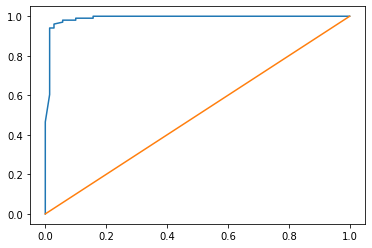

In [28]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

# PCA

In [29]:
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [31]:
d1 = raw['penguins']
d1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [32]:
d1.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [34]:
d2 = pd.get_dummies(d1, columns = ['island', 'sex'])
d2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,NaN,NaN,NaN,NaN,0,0,1,0,0
4,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0


In [41]:
imputer = KNNImputer(n_neighbors = 3)
d2_ = imputer.fit_transform(d2.drop(['species'], axis = 1))
d2_

array([[ 39.1,  18.7, 181. , ...,   1. ,   0. ,   1. ],
       [ 39.5,  17.4, 186. , ...,   1. ,   1. ,   0. ],
       [ 40.3,  18. , 195. , ...,   1. ,   1. ,   0. ],
       ...,
       [ 50.4,  15.7, 222. , ...,   0. ,   0. ,   1. ],
       [ 45.2,  14.8, 212. , ...,   0. ,   1. ,   0. ],
       [ 49.9,  16.1, 213. , ...,   0. ,   0. ,   1. ]])

In [43]:
d3 = pd.DataFrame(np.c_[d2.species.values.reshape(-1,1), d2_], columns = d2.columns)
d3.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0.0,0.0,1.0,0.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0,0.0,1.0,1.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0,0.0,1.0,1.0,0.0
3,Adelie,37.966667,18.466667,189.666667,3675.0,0.0,0.0,1.0,0.0,0.0
4,Adelie,36.7,19.3,193.0,3450.0,0.0,0.0,1.0,1.0,0.0


In [53]:
pca = PCA(n_components = 8)
x_ = pca.fit_transform(d3.drop(['species'], axis = 1))
d5 = pd.DataFrame(np.c_[d3.species.values.reshape(-1,1), x_], 
                  columns = ['species'] + [f'pc{a}' for a in range(1, 9)])
d5.head()

,species,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,Adelie,-451.33506,13.368195,1.137055,-0.195248,-0.767214,-0.274673,0.714661,-0.084274
1,Adelie,-401.262261,9.154721,-0.157933,-1.168658,-0.179255,0.636787,0.813228,-0.057026
2,Adelie,-951.052686,-8.266233,-2.364671,0.838567,-0.44187,0.582172,0.645036,-0.072251
3,Adelie,-526.19763,4.286815,-2.576817,0.776608,-0.431729,0.183703,0.710506,0.632756
4,Adelie,-751.12464,-1.980599,-4.826076,2.119124,-0.12949,0.896715,0.497801,-0.04791


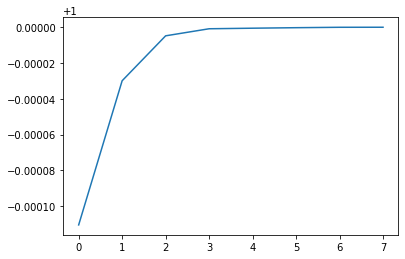

In [54]:
plt.plot(pca.explained_variance_ratio_.cumsum())

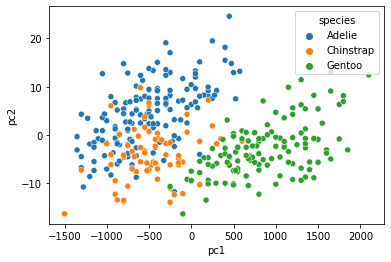

In [56]:
sns.scatterplot(data = d5, x = 'pc1', y = 'pc2', hue = 'species')